# Week 1 数据整理与可视化

参考用书《统计学(第六版)》 作者：贾俊平 (教育部经济管理类核心课程教材)

参考网站 [matplotlib中文网站](https://www.matplotlib.org.cn/)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号



# 数据透视表(pivot table)

In [2]:
# 读取 例3.1
df3_2=pd.read_excel('例题数据/例3.2.xlsx')
df3_2.head()

,编号,性别,家庭所在地区,平均月生活费(元),月平均衣物支出(元),买衣物首选因素
0,1,男,大型城市,800,200,价格
1,2,女,中小城市,600,180,款式
2,3,男,大型城市,1000,300,品牌
3,4,男,中小城市,400,40,价格
4,5,女,中小城市,500,150,款式


## pd.pivot_table()
- `data`:输入的Dataframe
- `values`:optional, 需要汇总的列
- `index`:用作索引的列, 每个pivot table必须有一个Index
- `columns`: optional, 根据所选的columns对汇总的特征进行进一步分割

In [105]:
help(pd.pivot_table)

Help on function pivot_table in module pandas.core.reshape.pivot:

pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
    Create a spreadsheet-style pivot table as a DataFrame. The levels in
    the pivot table will be stored in MultiIndex objects (hierarchical
    indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    data : DataFrame
    values : column to aggregate, optional
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
 

In [23]:
# 没有columns
pd.pivot_table(df3_2,values=['平均月生活费(元)','月平均衣物支出(元)'],
              index='家庭所在地区',aggfunc=np.mean)

,平均月生活费(元),月平均衣物支出(元)
家庭所在地区,,
中小城市,621.428571,151.071429
乡镇地区,633.333333,103.333333
大型城市,590.000000,156.000000


In [25]:
# 将'性别'设置成columns, 对原有的pivot table的特征(columns)进一步分割
pd.pivot_table(df3_2,values=['平均月生活费(元)','月平均衣物支出(元)'],columns='性别',
              index='家庭所在地区',aggfunc=np.mean)

平均月生活费(元)              月平均衣物支出(元)            
性别               女           男           女           男
家庭所在地区                                                
中小城市    528.571429  714.285714  113.571429  188.571429
乡镇地区    600.000000  650.000000  100.000000  105.000000
大型城市    550.000000  650.000000  146.666667  170.000000

# 频数分布表(cross tab)

In [26]:
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)
    Compute a simple cross tabulation of two (or more) factors. By default
    computes a frequency table of the factors unless an array of values and an
    aggregation function are passed.
    
    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row arrays passed.
    colnames : sequence, default None
        If passed, must match number of column arrays passed.
    aggfunc : function, optio

## pd.crosstab()
- `index`: 行汇总分类数据频数
- `columns`:列汇总分类数据频数
- `margins`:optional bool, 边缘总频率汇总, default to `False`

In [27]:
df3_3=pd.read_excel('例题数据/例3.3.xlsx')
df3_3.head()

,顾客性别,饮料类型
0,女,碳酸饮料
1,男,绿茶
2,男,矿泉水
3,女,矿泉水
4,男,碳酸饮料


In [28]:
pd.crosstab(df3_3['饮料类型'],df3_3['顾客性别'])

顾客性别,女,男
饮料类型,,
其他,6,2
果汁,5,1
矿泉水,4,6
碳酸饮料,9,6
绿茶,4,7


In [34]:
pd.crosstab(df3_3['饮料类型'],df3_3['顾客性别'],margins=True,margins_name='total')

顾客性别,女,男,total
饮料类型,,,
其他,6,2,8
果汁,5,1,6
矿泉水,4,6,10
碳酸饮料,9,6,15
绿茶,4,7,11
total,28,22,50


In [35]:
pd.crosstab(df3_3['顾客性别'],df3_3['饮料类型'],margins=True)

饮料类型,其他,果汁,矿泉水,碳酸饮料,绿茶,All
顾客性别,,,,,,
女,6,5,4,9,4,28
男,2,1,6,6,7,22
All,8,6,10,15,11,50


In [51]:
# 构造频数分布表
freq_table=pd.crosstab(index=df3_3['饮料类型'],columns=df3_3['顾客性别'],margins=True)
# 分布百分比
freq_table/len(df3_3)*100

顾客性别,女,男,All
饮料类型,,,
其他,12.0,4.0,16.0
果汁,10.0,2.0,12.0
矿泉水,8.0,12.0,20.0
碳酸饮料,18.0,12.0,30.0
绿茶,8.0,14.0,22.0
All,56.0,44.0,100.0


# 定性数据可视化
- 条形图
- 帕累托图
- 饼图

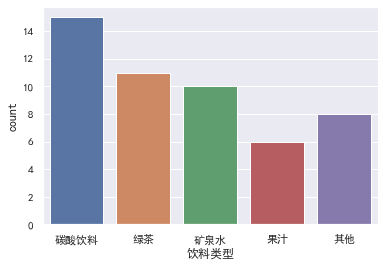

In [46]:
sns.countplot(data=df3_3,x='饮料类型')

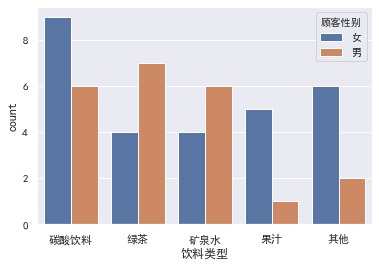

In [45]:
sns.countplot(data=df3_3,x='饮料类型',hue='顾客性别')

#### challenge: 堆积条形图
[参考点这里](https://www.matplotlib.org.cn/gallery/lines_bars_and_markers/bar_stacked.html)

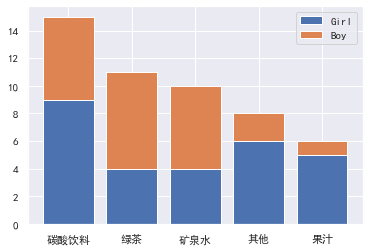

In [103]:
ind=freq_table.index.to_list()

p1=plt.bar(ind,freq_table['女'])
# 第二个bar一定要设置bottom=第一个变量
p2=plt.bar(ind,freq_table['男'],bottom=freq_table['女'])
plt.legend((p1[0],p2[0]),('Girl','Boy'))

In [96]:
freq_table

顾客性别,女,男,All,cumsum
饮料类型,,,,
碳酸饮料,9,6,15,15
绿茶,4,7,11,26
矿泉水,4,6,10,36
其他,6,2,8,44
果汁,5,1,6,50


In [52]:
# 删除最后一行All
freq_table=freq_table.iloc[:-1,:]
freq_table=freq_table.sort_values(by='All',ascending=False)
freq_table['cumsum']=freq_table['All'].cumsum()
freq_table

顾客性别,女,男,All,cumsum
饮料类型,,,,
碳酸饮料,9,6,15,15
绿茶,4,7,11,26
矿泉水,4,6,10,36
其他,6,2,8,44
果汁,5,1,6,50


### 帕累托图

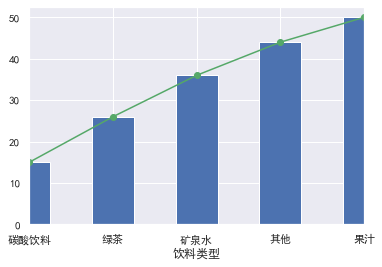

In [61]:
freq_table['cumsum'].plot(kind='bar')
freq_table['cumsum'].plot(style='-o',c='g')

### 饼图

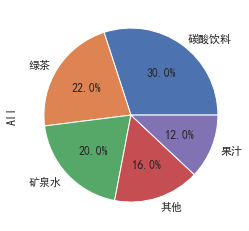

In [63]:
# autopct显示百分比格式
freq_table['All'].plot(kind='pie',autopct='%1.1f%%')

#### challenge: 双饼图绘制

[参考点这里](https://www.jianshu.com/p/1e08d03c41cb)

bug:内外层颜色不一致

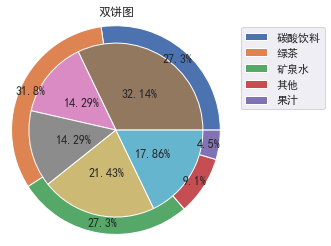

In [104]:
# 要画双饼图，无法直接使用plt.pie
# 需要用fig,ax=subplots方法
# 操作pie(radius参数)进行其中一个饼图的绘制
vals1 = freq_table['男']
vals2 = freq_table['女']
labels=freq_table.index.tolist()
fig, ax = plt.subplots()
ax.pie(vals1, radius=1.2,autopct='%1.1f%%',pctdistance=0.9)
ax.pie(vals2, radius=1,autopct='%1.2f%%',pctdistance=.5)
ax.set(aspect="equal", title='双饼图')
plt.legend(labels,loc='best',bbox_to_anchor=(1.05,1))

e:\python\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


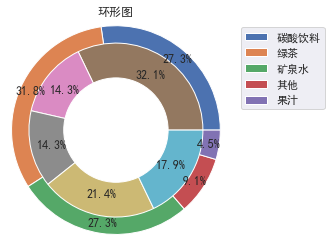

In [89]:
# 在双饼图的基础上增加一个ax
vals1 = freq_table['男']
vals2 = freq_table['女']
# vals3是第三个ax的占位变量, 用于挖空中心
vals3=1
labels=freq_table.index.tolist()
fig, ax = plt.subplots()
ax.pie(vals1, radius=1.2,autopct='%1.1f%%',pctdistance=0.9)
ax.pie(vals2, radius=1,autopct='%1.1f%%',pctdistance=.75)
# 最内层显示白色
ax.pie(vals3, radius=0.6,colors='w')
ax.set(aspect="equal", title='环形图')
plt.legend(labels,loc='best',bbox_to_anchor=(1.05,1))

In [2]:
df2_2=pd.read_excel('例题数据/2-2.xls')
df2_2

,地区,劳动者报酬,生产税净额,固定资产折旧,营业盈余
0,北 京,7992.380000,2566.16,2155.800000,3537.59
1,天 津,4378.140000,1771.81,1416.060000,3741.27
2,上 海,7709.620000,3713.40,2298.340000,5474.33
3,重 庆,4930.412326,1486.41,1068.847674,2525.70


e:\python\python37\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


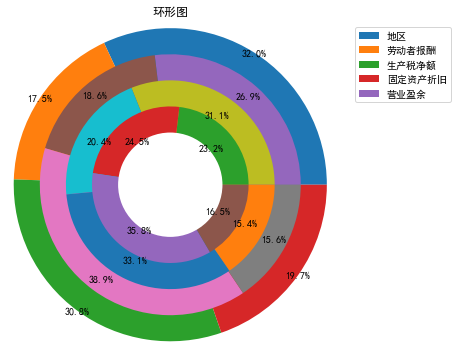

In [17]:
vals1 = df2_2['劳动者报酬']
vals2 = df2_2['生产税净额']
vals3= df2_2['固定资产折旧']
vals4=df2_2['营业盈余']
vals5=1
labels=df2_2.columns.tolist()
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(vals1, radius=1.2,autopct='%1.1f%%',pctdistance=1.)
ax.pie(vals2, radius=1,autopct='%1.1f%%',pctdistance=.9)
ax.pie(vals3, radius=0.8,autopct='%1.1f%%',pctdistance=.8)
ax.pie(vals4,radius=0.6,autopct='%1.1f%%',pctdistance=.7)
ax.pie(vals5,radius=.4,colors='w')
ax.set(aspect="equal", title='环形图')
plt.legend(labels,loc='best',bbox_to_anchor=(1.05,1))

# 定量数据可视化
- 分组数据
    - 频数分布直方图
- 未分组数据
    - 茎叶图
    - 箱线图
    - 垂线图
    - 误差图
- 双变量关系
    - 散点图
- 多样本相似系
    - 雷达图
    - 轮廓图
    

## 频数分布表

In [18]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges allowing f

In [20]:
df2_3=pd.read_excel('例题数据/2-3.xls',sheet_name='排序',header=None)
df2_3

,0,1,2,3,4,5,6,7,8,9
0,141,159,166,172,177,182,188,196,203,214
1,143,160,167,173,177,183,189,196,203,215
2,144,160,168,173,178,184,189,196,205,218
3,149,161,168,174,178,185,189,196,206,223
4,150,161,168,174,178,186,190,196,207,225
5,152,162,170,174,179,186,190,197,208,226
6,153,163,171,175,179,187,191,197,209,228
7,153,163,171,175,179,187,192,198,210,233
8,154,164,172,175,180,187,194,198,210,233
9,155,165,172,175,180,187,194,200,211,234


In [25]:
arr2_3=df2_3.values.flatten()
arr2_3

array([141, 159, 166, 172, 177, 182, 188, 196, 203, 214, 143, 160, 167,
       173, 177, 183, 189, 196, 203, 215, 144, 160, 168, 173, 178, 184,
       189, 196, 205, 218, 149, 161, 168, 174, 178, 185, 189, 196, 206,
       223, 150, 161, 168, 174, 178, 186, 190, 196, 207, 225, 152, 162,
       170, 174, 179, 186, 190, 197, 208, 226, 153, 163, 171, 175, 179,
       187, 191, 197, 209, 228, 153, 163, 171, 175, 179, 187, 192, 198,
       210, 233, 154, 164, 172, 175, 180, 187, 194, 198, 210, 233, 155,
       165, 172, 175, 180, 187, 194, 200, 211, 234, 156, 165, 172, 176,
       181, 188, 195, 201, 211, 234, 158, 165, 172, 176, 182, 188, 195,
       202, 213, 237], dtype=int64)

In [55]:
bins_data=pd.cut(arr2_3,bins=10,precision=0)
bins_counts=bins_data.value_counts()
bins_freq=bins_data.value_counts()/np.sum(bins_counts.value_counts())
bins_df=pd.DataFrame({
    '频数':bins_counts,
    '频率':bins_freq
})
bins_df

,频数,频率
"(141.0, 151.0]",5,0.5
"(151.0, 160.0]",10,1.0
"(160.0, 170.0]",14,1.4
"(170.0, 179.0]",27,2.7
"(179.0, 189.0]",20,2.0
"(189.0, 199.0]",17,1.7
"(199.0, 208.0]",9,0.9
"(208.0, 218.0]",8,0.8
"(218.0, 227.0]",4,0.4
"(227.0, 237.0]",6,0.6


### 直方图

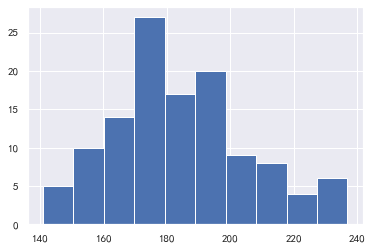

In [58]:
ser2_3=pd.Series(arr2_3)
ser2_3.hist(bins=10)

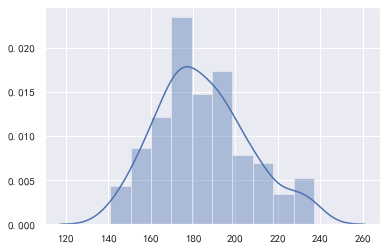

In [60]:
sns.distplot(ser2_3)

### 茎叶图

In [62]:
from itertools import groupby

for k,g in groupby(sorted(arr2_3,key=lambda x:int(x)//10)):
    lst=map(str,[int(y)%10 for y in list(g)])
    print(k,'|',' '.join(lst))

141 | 1
143 | 3
144 | 4
149 | 9
159 | 9
150 | 0
152 | 2
153 | 3 3
154 | 4
155 | 5
156 | 6
158 | 8
166 | 6
160 | 0
167 | 7
160 | 0
168 | 8
161 | 1
168 | 8
161 | 1
168 | 8
162 | 2
163 | 3 3
164 | 4
165 | 5 5 5
172 | 2
177 | 7
173 | 3
177 | 7
173 | 3
178 | 8
174 | 4
178 | 8
174 | 4
178 | 8
170 | 0
174 | 4
179 | 9
171 | 1
175 | 5
179 | 9
171 | 1
175 | 5
179 | 9
172 | 2
175 | 5
172 | 2
175 | 5
172 | 2
176 | 6
172 | 2
176 | 6
182 | 2
188 | 8
183 | 3
189 | 9
184 | 4
189 | 9
185 | 5
189 | 9
186 | 6 6
187 | 7 7
180 | 0
187 | 7
180 | 0
187 | 7
181 | 1
188 | 8
182 | 2
188 | 8
196 | 6 6 6 6
190 | 0
196 | 6
190 | 0
197 | 7
191 | 1
197 | 7
192 | 2
198 | 8
194 | 4
198 | 8
194 | 4
195 | 5 5
203 | 3 3
205 | 5
206 | 6
207 | 7
208 | 8
209 | 9
200 | 0
201 | 1
202 | 2
214 | 4
215 | 5
218 | 8
210 | 0 0
211 | 1 1
213 | 3
223 | 3
225 | 5
226 | 6
228 | 8
233 | 3 3
234 | 4 4
237 | 7


### 箱线图

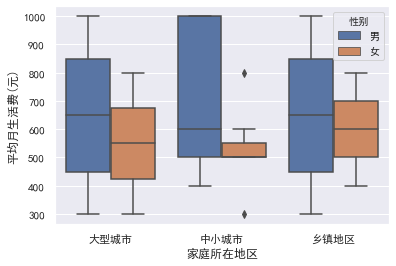

In [7]:
sns.boxplot(data=df3_2,x='家庭所在地区',y='平均月生活费(元)',hue='性别')

### 散点图

In [9]:
df2_5=pd.read_excel('例题数据/2-5.xls')
df2_5.head()

,地区,地区生产总值,固定资产投资,最终消费支出
0,北 京,16251.93,5578.9271,9488.16
1,天 津,11307.28,7067.6653,4286.34
2,河 北,24515.76,16389.3255,9633.82
3,山 西,11237.55,7073.0613,4868.11
4,内蒙古,14359.88,10365.1692,5526.64


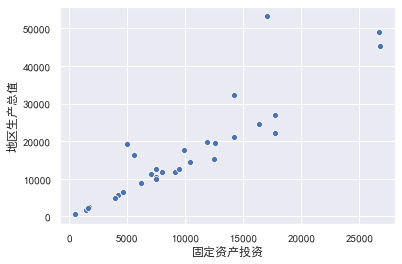

In [11]:
sns.scatterplot(data=df2_5,x='固定资产投资',y='地区生产总值')

e:\python\python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\python\python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


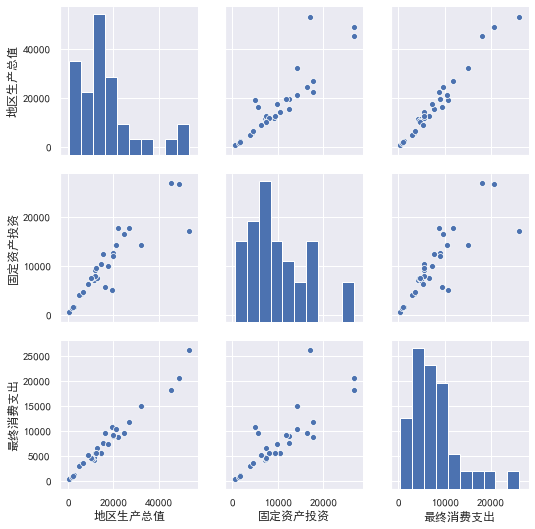

In [17]:
# 散点图矩阵
sns.pairplot(df2_5)

### 雷达图

matplotlib绘制雷达图太难了，用pyecharts简单些

In [20]:
df2_6=pd.read_excel('例题数据/2-6.xls')
df2_6

,支出项目,东部地区,中部地区,西部地区,东北地区
0,食 品,6329.16,4710.73,5121.50,4730.34
1,衣 着,1754.98,1535.81,1618.17,1778.85
2,居 住,1635.17,1235.30,1162.23,1339.45
3,家庭设备及用品,1205.20,870.73,916.00,841.70
4,交通通信,2838.34,1534.34,1699.59,1642.75
5,文教娱乐,2360.19,1475.51,1447.33,1443.02
6,医疗保健,1033.13,855.99,880.45,1144.63
7,其他,713.88,428.56,490.65,570.51


In [47]:
items=df2_6['支出项目'].tolist()
east=df2_6['东部地区'].tolist()
central=df2_6['中部地区'].tolist()
west=df2_6['西部地区'].tolist()
norheast=df2_6['东北地区'].tolist()
itemDict={'max':6500}

schema=[]
for item in items:
        tempDict=itemDict.copy()
        tempDict['name']=item
        schema.append(tempDict)
        
schema

[{'max': 6500, 'name': '食 品'},
 {'max': 6500, 'name': '衣 着'},
 {'max': 6500, 'name': '居 住'},
 {'max': 6500, 'name': '家庭设备及用品'},
 {'max': 6500, 'name': '交通通信'},
 {'max': 6500, 'name': '文教娱乐'},
 {'max': 6500, 'name': '医疗保健'},
 {'max': 6500, 'name': '其他'}]

In [48]:
# jupyterlab 渲染需要导入
from pyecharts.globals import CurrentConfig, NotebookType
from pyecharts.charts import Radar
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

radar=Radar()
radar.add_schema(schema=schema)
radar.add('东部地区',[east])
radar.add('中部地区',[central])
radar.add('西部地区',[west])
radar.add('东北地区',[norheast])
radar.load_javascript()
radar.render_notebook()